### IMPORT REQUIRED LIBRARIES AND DEPENDENCIES

In [132]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### Putting .weights, .cfg files 

In [133]:
yolo=cv2.dnn.readNet('yolov3.weights','yolov3.cfg')

In [134]:
# coco.names file having different object names present 
categories=[]
with open('coco.names','r') as f:
    categories=f.read().splitlines()

In [135]:
len(categories)

80

In [136]:
image=cv2.imread('bus.jpeg')

In [137]:
new_image=cv2.dnn.blobFromImage(image,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [138]:
new_image.shape

(1, 3, 320, 320)

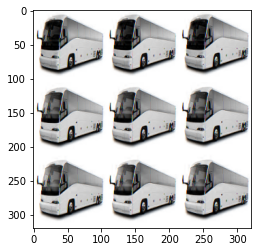

In [139]:
# For printing the image
im=new_image[0].reshape(320,320,3)
plt.imshow(im)

In [140]:
yolo.setInput(new_image)

In [141]:
output_layers_names=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_names)

In [142]:
# width=image.shape[1]
# height=image.shape[0]

b_boxes=[]
confidences=[]
category_ids=[]

for output in layeroutput:
    for detection in output:
        score=detection[5:]
        category_id=np.argmax(score)
        confi=score[category_id]
        if confi>0.7:
            center_x=int(detection[0]*width)
            center_y=int(detection[0]*height)  
            w=int(detection[0]*width)
            h=int(detection[0]*height)

            x=int(center_x-w/2)
            y=int(center_y-h/2)

            b_boxes.append([x,y,w,h])
            confidences.append(float(confi))
            category_ids.append(category_id)          

In [143]:
# detected number of objects over there
len(b_boxes)

5

In [144]:
# adding the bounding boxes to the images
indexes=cv2.dnn.NMSBoxes(b_boxes,confidences,0.5,0.4)

In [145]:
# adding font to the images

font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(b_boxes),3))

In [146]:
# adding bounding boxes to each object

for i in indexes.flatten():
    x,y,w,h=b_boxes[i]
    label=str(categories[category_ids[i]])
    confidence=str(round(confidences[i],2))
    color=colors[i]

    # adding rectangular bounding boxes
    cv2.rectangle(image,(x,y),(x+w,y+h),color,2)
    # adding label to specify the text position
    cv2.putText(image,label +' '+confidence, (x,y+20),font,2,(255,255,255),2)

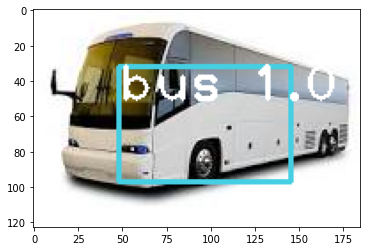

In [147]:
plt.imshow(image)